In [90]:
#pip install -qU pandas numpy matplotlib seaborn scikit-learn xgboost lightgbm scipy catboost imbalanced-learn openpyxl nbformat jupyter nbconvert

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix
from math import sqrt
from pickle import dump
from scipy import stats



## Análise exploratoria

In [92]:
df = pd.read_csv("bank customer churn dataset.csv")

In [93]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [94]:
df.shape

(10000, 14)

In [95]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [97]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [98]:
df.duplicated().sum()

np.int64(0)

### Data Cleaning

In [99]:
df.rename(columns={'HasCrCard': 'Has credit card','IsActiveMember':'Is Active Member','CreditScore':'Credit Score',
                   'NumOfProducts':'Number Of Products','EstimatedSalary':'Estimated Salary','Exited':'Churned'} ,inplace=True)

In [100]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], inplace=True, axis=1)

### Visão Geral Estatística Básica
- Resumo Estatístico: describe()

In [101]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Credit Score,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
Number Of Products,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
Has credit card,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
Is Active Member,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
Estimated Salary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Churned,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


- Resumo Estatístico : **value_counts()**
----------------------

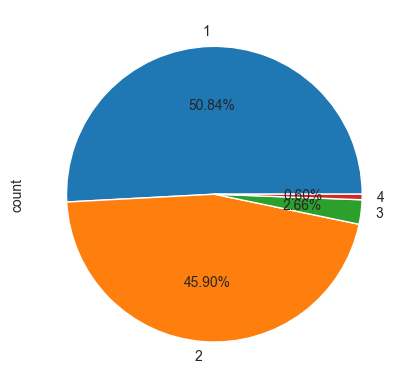

In [102]:
df['Number Of Products'].value_counts().plot.pie(autopct='%0.2f%%')
plt.show()

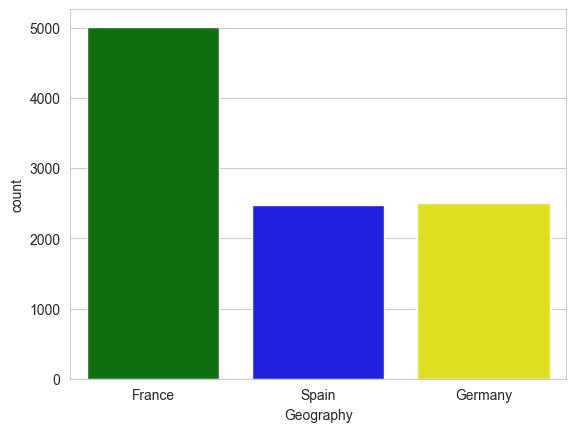

In [103]:
sns.countplot(x='Geography', data=df, hue='Geography', palette=['green','blue','yellow'], legend=False)
plt.show()

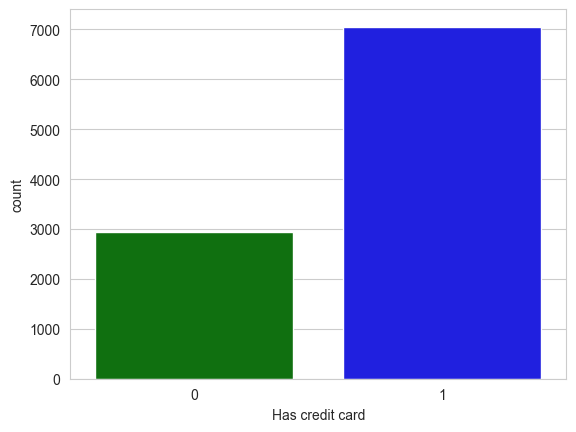

In [104]:
sns.countplot(x='Has credit card', hue='Has credit card', data=df, palette=['green','blue'], legend=False)
plt.show()

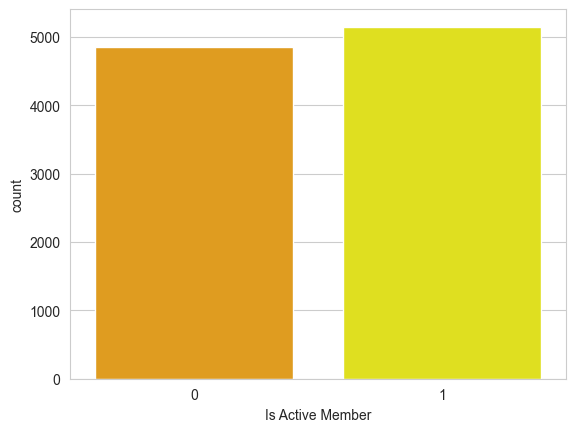

In [105]:
sns.countplot(x='Is Active Member', hue='Is Active Member', data=df, palette=['orange','yellow'], legend=False)
plt.show()

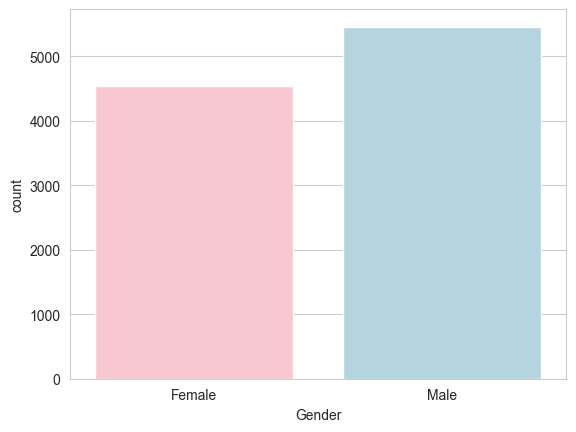

In [106]:
sns.countplot(x='Gender', hue='Gender', data=df, palette=['pink','lightblue'], legend=False)
plt.show()

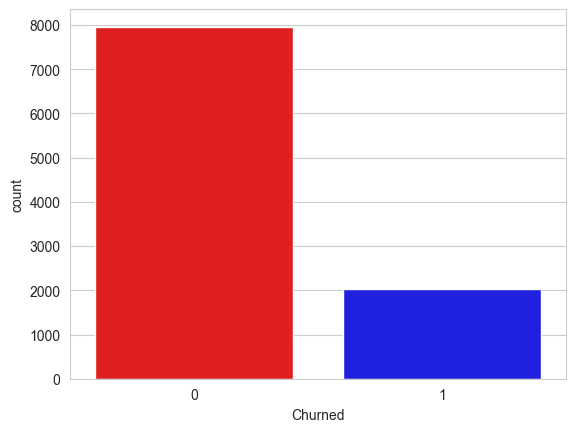

In [107]:
sns.countplot(x='Churned', hue='Churned', data=df, palette=['red','blue'], legend=False)
plt.show()

### Distribuição de Variáveis
- Recursos Numéricos (KDE)

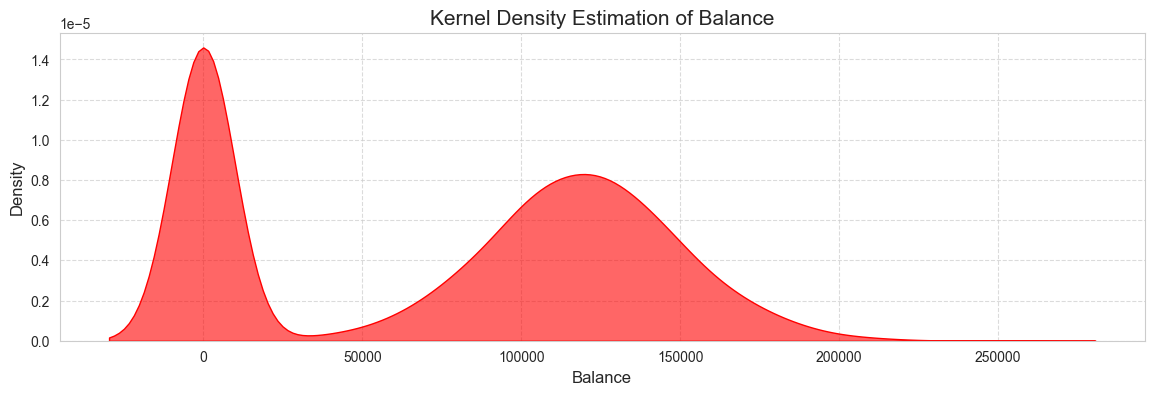

In [108]:
plt.figure(figsize=(14, 4))
sns.kdeplot(df['Balance'], fill=True, color='red', alpha=0.6)
plt.title('Kernel Density Estimation of Balance', fontsize=15)
plt.xlabel('Balance', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


- #### **Primeiro Pico:** O primeiro e menor pico está localizado em um saldo de aproximadamente 0. Isso sugere uma alta concentração de indivíduos com pouco ou nenhum saldo.
- #### **Segundo Pico:** O segundo e maior pico está centrado em um saldo de aproximadamente 120.000. Isso indica outro grupo significativo de indivíduos com saldos concentrados em torno desse valor mais alto.

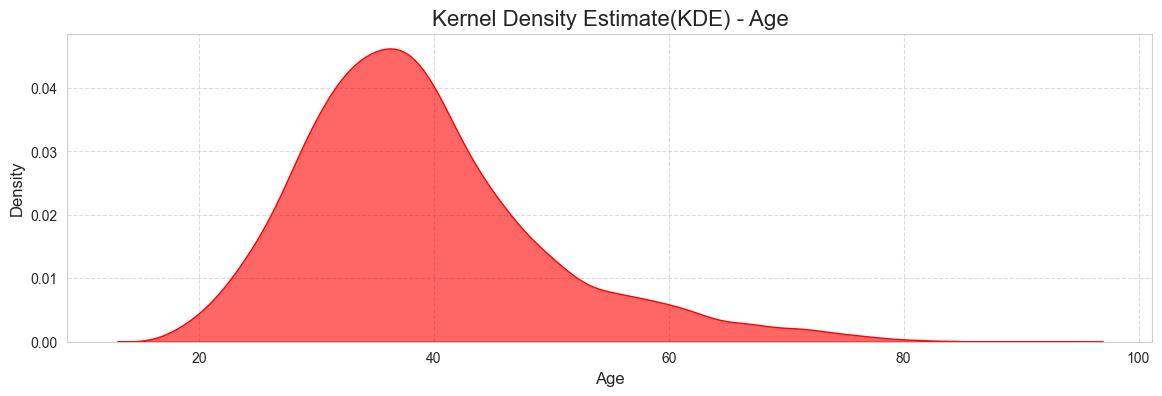

In [109]:
plt.figure(figsize=(14, 4))
sns.kdeplot(df['Age'], fill=True, color='red', alpha=0.6)
plt.title('Kernel Density Estimate(KDE) - Age',	fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


- #### **O gráfico revela uma distribuição com assimetria positiva (também conhecida como assimetria à direita). Isso significa que a cauda da distribuição se estende para a direita, indicando que, embora a maioria dos dados esteja concentrada no lado esquerdo, há um número menor de indivíduos em idades mais avançadas.**
- #### **A distribuição possui um único pico, ou moda, que representa a faixa etária mais frequente. A maior densidade de indivíduos está em torno dos 40 anos. A densidade diminui rapidamente após o pico, com uma queda gradual e prolongada em direção às idades mais altas, chegando a quase 100 anos. A densidade de indivíduos em idades mais jovens (abaixo de 20 anos) é muito baixa.**

### Verificação da correlação entre as features

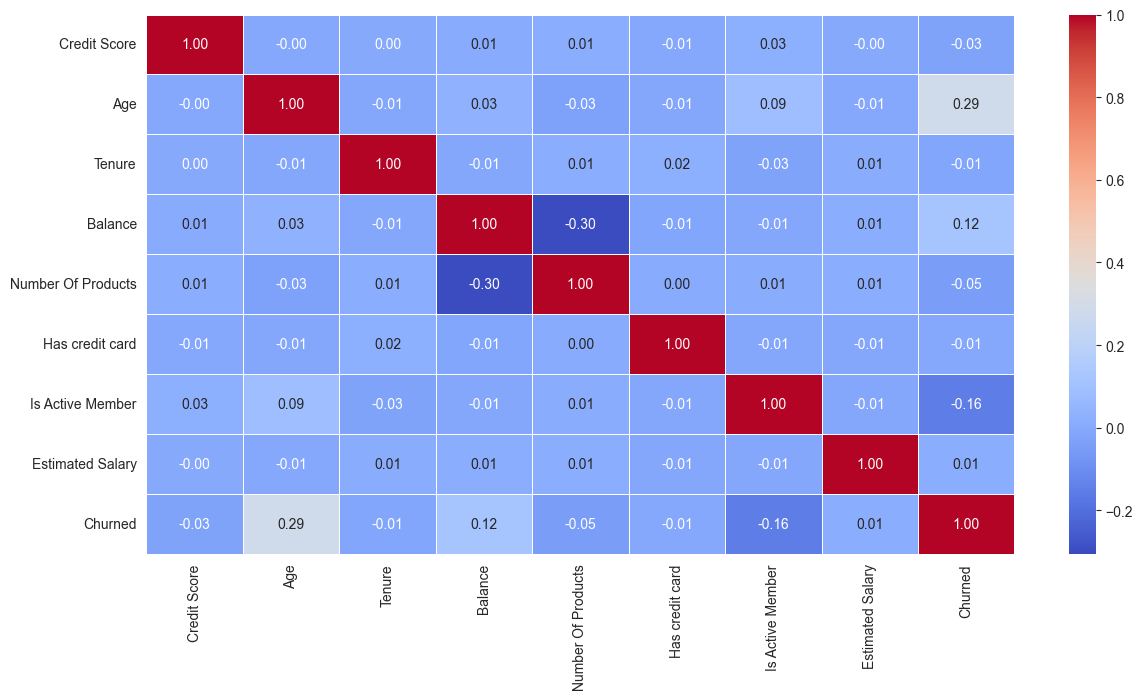

In [110]:
plt.figure(figsize=(14, 7))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

- #### Há uma correlação positiva normal (0,3) entre **Age** e **Churned**.
- #### Há uma correlação negativa normal (-0,3) entre **Balance** e **Number of products**.

### Extração de Feature

In [111]:
def ageGroup(age):
    age = int(age)
    if age <= 40:
        return 'Young Adults'
    elif age > 40 and age < 60:
        return 'Middle-Aged Adults'
    else:
        return 'Senior Adults'
    
df['Age Group'] = df['Age'].apply(lambda x: ageGroup(x))

In [112]:
df['Age Group'].value_counts()

Age Group
Young Adults          6419
Middle-Aged Adults    3055
Senior Adults          526
Name: count, dtype: int64

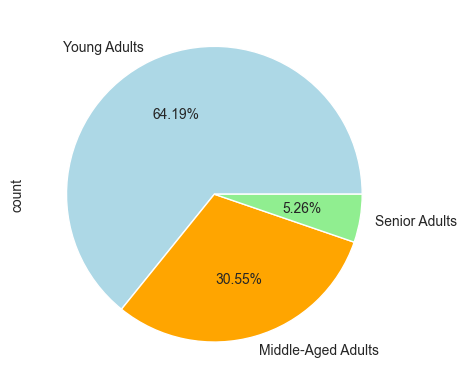

In [113]:
df['Age Group'].value_counts().plot.pie(autopct='%0.2f%%', colors=['lightblue','orange','lightgreen'])
plt.show()

In [114]:
def balanceGroup(balance):
    balance = float(balance)
    if balance > 0:
        return 'Funded account'
    elif balance == 0:
        return 'Empty account'
    else:
        return 'Overdrawn account'
    
df['Balance category'] = df['Balance'].apply(lambda x: balanceGroup(x))
    

In [115]:
df['Balance category'].value_counts()

Balance category
Funded account    6383
Empty account     3617
Name: count, dtype: int64

In [116]:
def activeGroup(actAcc):
    actAcc = int(actAcc)
    if actAcc == 1:
        return 'Active account'
    else:
        return 'Dormant account'
    
df['Is active Member']= df['Is Active Member'].apply(lambda x: activeGroup(x))

In [117]:
df['Is Active Member'].value_counts()

Is Active Member
1    5151
0    4849
Name: count, dtype: int64

In [118]:
def cardGroup(card):
    card = int(card)
    if card == 1:
        return 'Has a card'
    else:
        return 'No card'
    
df['Has credit card'] = df['Has credit card'].apply(lambda x: cardGroup(x))

In [119]:
df['Has credit card'].value_counts()

Has credit card
Has a card    7055
No card       2945
Name: count, dtype: int64

In [120]:
def categorize_credit(score):
    if score < 580:
        return 'Poor'
    elif score < 670:
        return 'Fair'
    elif score < 740:
        return 'Good'
    elif score < 800:
        return 'Very Good'
    else:
        return 'Exceptional'
    
df['Credit Score Category'] = df['Credit Score'].apply(categorize_credit)

In [121]:
df['Credit Score Category'].value_counts()

Credit Score Category
Fair           3331
Good           2428
Poor           2362
Very Good      1224
Exceptional     655
Name: count, dtype: int64

In [122]:
def Churned(exit):
    exit = int(exit)
    if exit == 1:
        return 'Churned'
    else:
        return 'Not churned'
    
df['Churned'] = df['Churned'].apply(lambda x: Churned(x))

In [123]:
df['Churned'].value_counts()

Churned
Not churned    7963
Churned        2037
Name: count, dtype: int64

In [124]:
def category_Estimated_Salary(Salary):
    if Salary < 50000:
        return 'Low'
    elif Salary < 100000:
        return 'Medium'
    elif Salary < 150000:
        return 'High'
    else:
        return 'Very High'
    
df['Estimated Salary Category'] = df['Estimated Salary'].apply(category_Estimated_Salary)

In [125]:
df['Estimated Salary Category'].value_counts()

Estimated Salary Category
High         2555
Medium       2537
Very High    2455
Low          2453
Name: count, dtype: int64

In [126]:
df['BalanceSalaryRatio'] = df['Balance'] / df['Estimated Salary']

In [127]:
df[['Balance', 'Estimated Salary', 'BalanceSalaryRatio']].head()

,Balance,Estimated Salary,BalanceSalaryRatio
0,0.00,101348.88,0.000000
1,83807.86,112542.58,0.744677
2,159660.80,113931.57,1.401375
3,0.00,93826.63,0.000000
4,125510.82,79084.10,1.587055


In [128]:
import os

if not os.path.exists('analysis'):
    os.makedirs('analysis')

df.to_excel('analysis/bank customer churn new dataset.xlsx', index=False)

### Análises

- análise geral de clientes


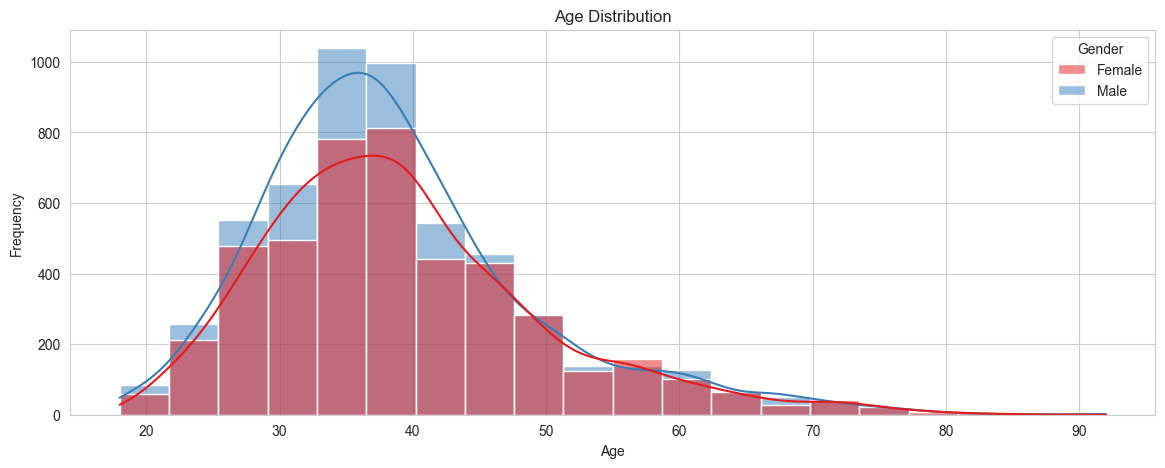

In [129]:
#Distribuiição por genero e idade

plt.figure(figsize=(14, 5))
sns.histplot(data=df, x= 'Age', hue='Gender', kde=True, bins=20, palette='Set1')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

- ##### **A distribuição etária masculina é representada pelas barras e curvas azuis.**

- ##### **A frequência máxima para homens é ligeiramente mais velha do que para mulheres, atingindo o pico entre o final dos 30 e o início dos 40 anos.**

- ##### **A contagem de homens é consistentemente maior do que a de mulheres na maior parte da faixa etária mostrada.**
------------------------

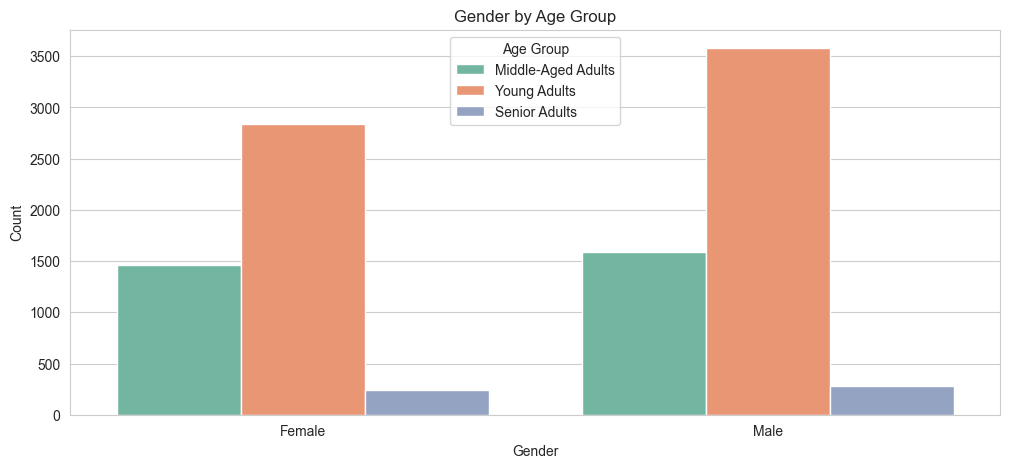

In [130]:
plt.figure(figsize=(12, 5))
sns.countplot(data = df, x = 'Gender', hue='Age Group', palette='Set2')
plt.title('Gender by Age Group')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

- ##### **Em ambos os gêneros, os jovens adultos são a faixa etária mais representada, seguidos pelos adultos de meia-idade e, em seguida, pelos idosos.**

- ##### **A contagem total de homens é maior do que a contagem total de mulheres. Isso é evidente, pois as barras para cada faixa etária são consistentemente mais altas para os homens do que para as mulheres.**

- ##### **A distribuição das faixas etárias é semelhante para ambos os gêneros, com a contagem de jovens adultos sendo significativamente maior do que a de adultos de meia-idade, e os idosos sendo o menor grupo.**
---------------------------

In [131]:
countOfChurnedOrNoByGender = pd.crosstab(df['Gender'], df['Churned'])
countOfChurnedOrNoByGender

Churned,Churned,Not churned
Gender,,
Female,1139,3404
Male,898,4559


In [132]:
val1 = countOfChurnedOrNoByGender.iloc[0,:1].values
val2 = countOfChurnedOrNoByGender.iloc[0,1:2].values

sum = val1 + val2
p = (val1/sum)*100
p2 = (val2/sum)*100
print('Exited Female', p, '%')
print('Stayed Female', p2, '%')

Exited Female [25.07153863] %
Stayed Female [74.92846137] %


In [133]:
val1 = countOfChurnedOrNoByGender.iloc[1,:1].values
val2 = countOfChurnedOrNoByGender.iloc[1,1:2].values


sum = val1 + val2
p = (val1/sum)*100
p2 =(val2/sum)*100
print('Exited Male', p, '%')
print('Stayed Male', p2, '%')

Exited Male [16.45592817] %
Stayed Male [83.54407183] %


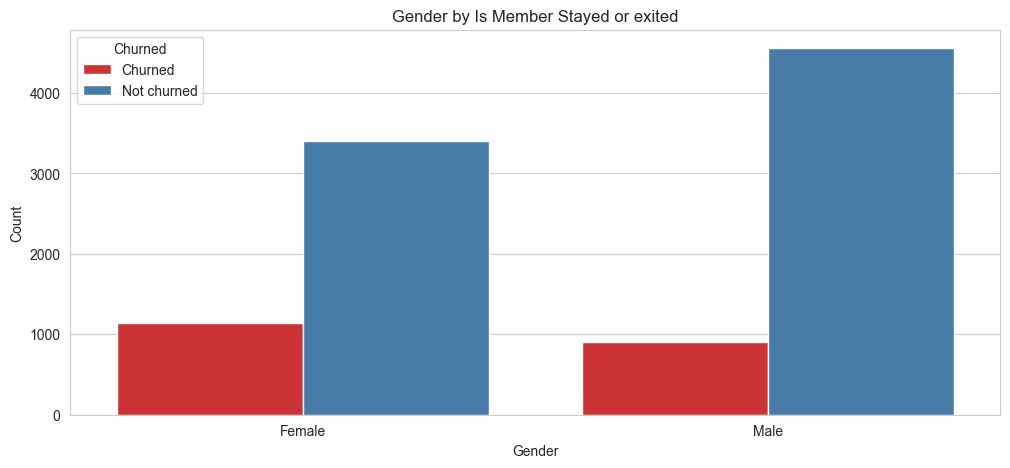

In [134]:
plt.figure(figsize=(12, 5))
sns.countplot(data = df, x= 'Gender', hue = 'Churned', palette='Set1')
plt.title('Gender by Is Member Stayed or exited')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

- ##### **Há um número total maior de homens no conjunto de dados do que de mulheres, já que a barra "Permaneceu" para homens é muito mais alta do que a barra "Permaneceu" para mulheres, e o mesmo vale para as barras "Saiu".**

- ##### **O gráfico mostra claramente que uma proporção maior de mulheres saiu do grupo em comparação com os homens.**

- ##### **Embora o número absoluto de mulheres que saíram seja maior do que o de homens, a porcentagem de mulheres que saíram também é maior quando comparada ao número total de membros do sexo feminino em comparação com os do sexo masculino.**
------------------------

- ##### **Distribuição de pontuação de crédito por gênero**

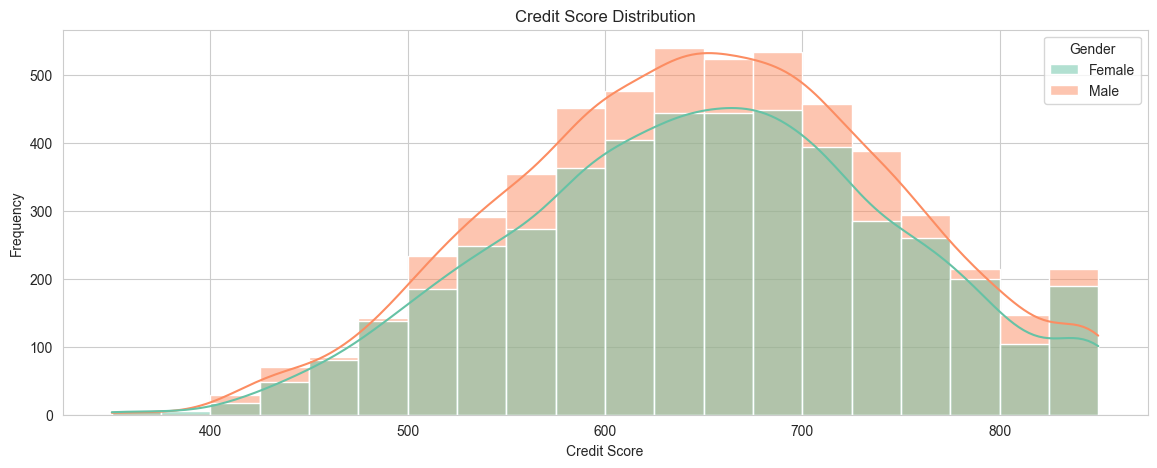

In [135]:
plt.figure(figsize=(14, 5))
sns.histplot(data=df, x= 'Credit Score', hue='Gender', kde=True, bins=20, palette='Set2')
plt.title('Credit Score Distribution')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

##### **A distribuição das pontuações de crédito para homens e mulheres segue uma curva em forma de sino quase idêntica e esperada, centrada em torno de pontuações de 600 a 650. Embora haja uma tendência sutil mostrando uma frequência ligeiramente maior de homens nas faixas de pontuação mais baixas e uma frequência ligeiramente maior de mulheres nas faixas mais altas, as distribuições gerais são notavelmente semelhantes. Isso indica que o gênero não é um fator diferenciador significativo nos resultados da pontuação de crédito para este conjunto de dados, sugerindo que o modelo de pontuação é efetivamente neutro em relação ao gênero, como pretendido.**
-------------------------------------

### Estimativa da distribuição de salário por genêro

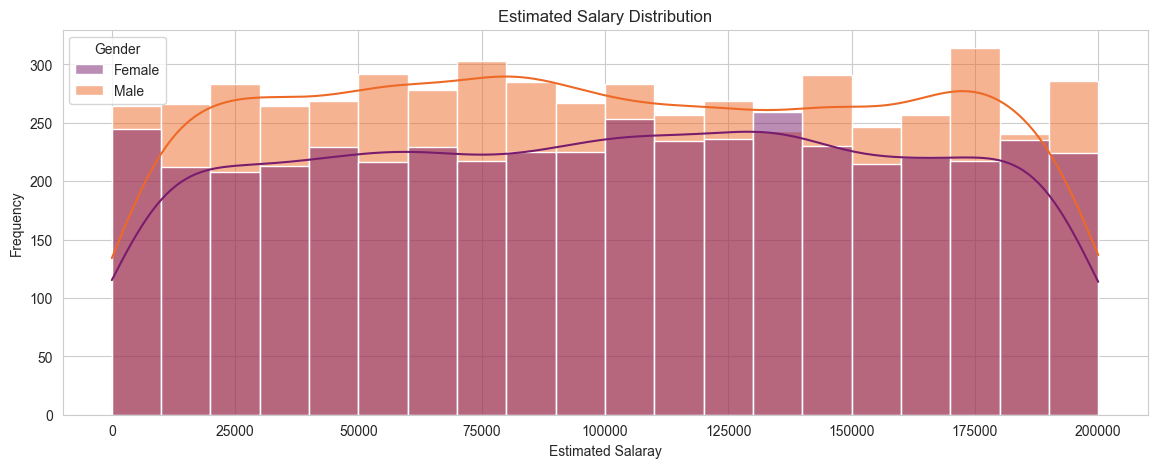

In [136]:
plt.figure(figsize=(14, 5))
sns.histplot(data=df, x='Estimated Salary', hue='Gender', kde=True, bins=20, palette='inferno')
plt.title('Estimated Salary Distribution')
plt.xlabel('Estimated Salaray')
plt.ylabel('Frequency')
plt.show()

##### **Este histograma de salários estimados revela uma distribuição acentuadamente assimétrica à direita para ambos os gêneros, mas com uma disparidade significativa nas faixas de renda mais alta. Embora tanto homens quanto mulheres sejam mais frequentemente encontrados na faixa salarial mais baixa, a distribuição para os homens se estende muito mais para as faixas de renda mais altas (US$ 100.000 a US$ 200.000), com uma frequência muito maior de homens nessas faixas. Por outro lado, as mulheres estão mais concentradas nas faixas salariais baixas e médias. Isso fornece evidências visuais claras de uma disparidade salarial entre gêneros neste conjunto de dados, sugerindo que os homens têm uma probabilidade significativamente maior de ocupar os cargos mais bem pagos.**

- ##### **Comparação de geografia entre homens e mulheres**

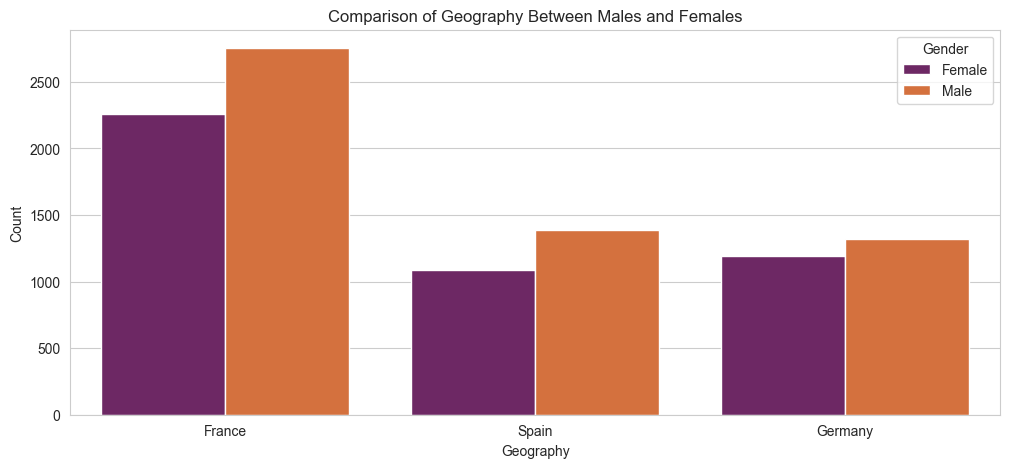

In [137]:
plt.figure(figsize=(12, 5))
sns.countplot(data = df, x ='Geography', hue='Gender',palette='inferno')
plt.title('Comparison of Geography Between Males and Females')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.show()

##### **Esta análise da base de clientes do banco revela diferenças geográficas marcantes em seu apelo a diferentes gêneros: sua clientela na França é predominantemente masculina, na Espanha é perfeitamente equilibrada e na Alemanha é predominantemente feminina. Isso indica que os produtos, serviços ou estratégias de marketing do banco repercutem de forma diferente entre homens e mulheres, dependendo do país.**

- ##### **Comparação de retenção e rotatividade de clientes na França, Espanha e Alemanha**

In [138]:
countOfChurnedOrNoByGeography = pd.crosstab(df['Geography'], df['Churned'])
countOfChurnedOrNoByGeography

Churned,Churned,Not churned
Geography,,
France,810,4204
Germany,814,1695
Spain,413,2064


In [139]:
val1 = countOfChurnedOrNoByGeography.iloc[0,:1].values
val2 = countOfChurnedOrNoByGeography.iloc[0,1:2].values

sum = val1 + val2
p = (val1/sum)*100
p2 = (val2/sum)*100
print('Exited France',p,'%')
print('Stayed France',p2,'%')

Exited France [16.15476665] %
Stayed France [83.84523335] %


In [140]:
val1 = countOfChurnedOrNoByGeography.iloc[1,:1].values
val2 = countOfChurnedOrNoByGeography.iloc[1,1:2].values

sum = val1 + val2
p = (val1/sum)*100
p2 = (val2/sum)*100
print('Exited Germany',p,'%')
print('Stayed Germany',p2,'%')

Exited Germany [32.44320446] %
Stayed Germany [67.55679554] %


In [141]:
val1 = countOfChurnedOrNoByGeography.iloc[2,:1].values
val2 = countOfChurnedOrNoByGeography.iloc[2,1:2].values

sum = val1 + val2
p = (val1/sum)*100
p2 = (val2/sum)*100
print('Exited Spain',p,'%')
print('Stayed Spain',p2,'%')

Exited Spain [16.67339524] %
Stayed Spain [83.32660476] %


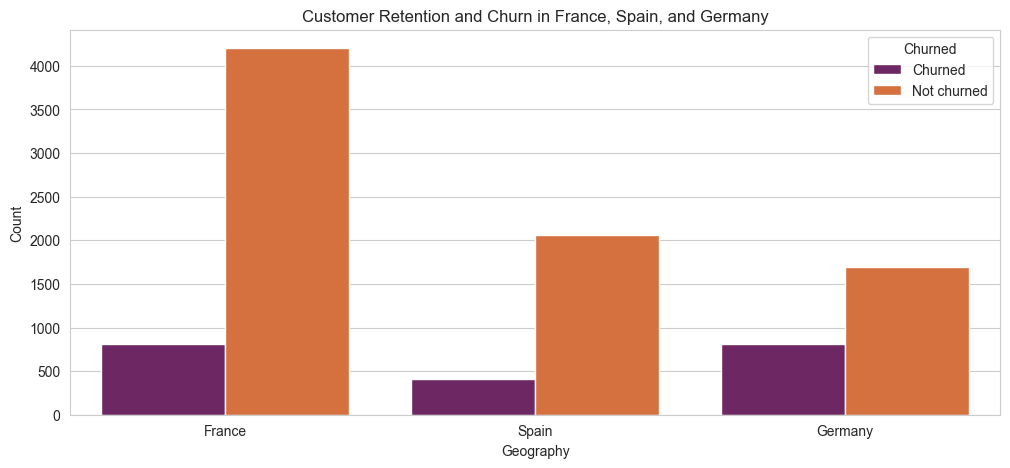

In [142]:
plt.figure(figsize=(12, 5))
sns.countplot(data = df, x ='Geography', hue='Churned',palette='inferno')
plt.title('Customer Retention and Churn in France, Spain, and Germany')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.show()

- ##### **A França tem a maior base total de clientes.**

- ##### **O número de clientes que saíram é praticamente o mesmo na França e na Alemanha, apesar da França ter uma base total de clientes muito maior.**

- ##### **O número de clientes que saíram é o menor na Espanha.**

- ##### **Ao analisar a proporção de clientes que saíram, a Alemanha tem a maior taxa de rotatividade, seguida pela França. A Espanha tem a menor taxa de rotatividade.**
---------------------------------

- ##### **Comparação da categoria salarial estimada entre homens e mulheres**

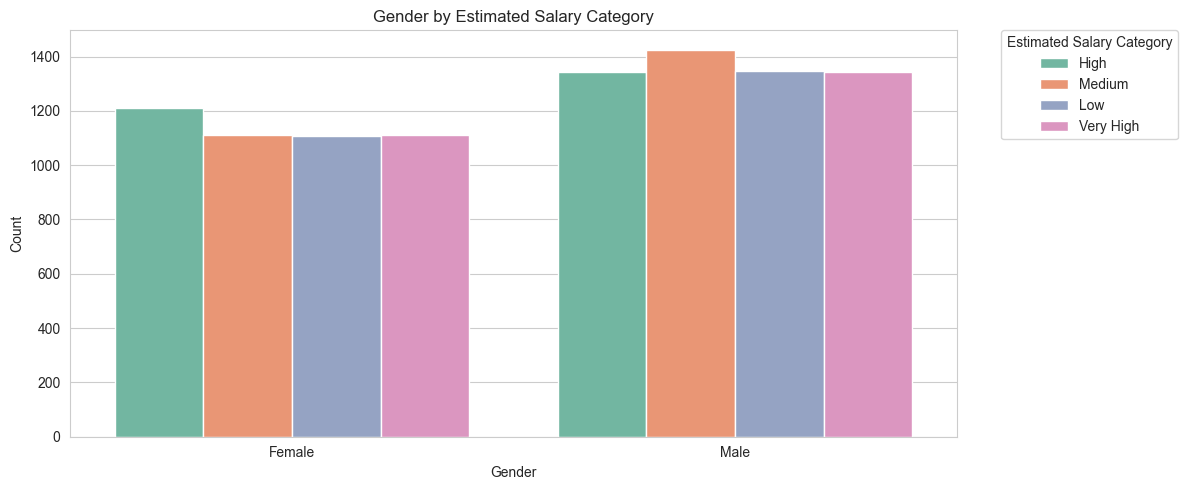

In [143]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='Gender', hue='Estimated Salary Category', palette='Set2')

plt.title('Gender by Estimated Salary Category')
plt.xlabel('Gender')
plt.ylabel('Count')

# Coloca a legenda fora, à direita
plt.legend(
    title='Estimated Salary Category',
    bbox_to_anchor=(1.05, 1),  # posição fora do eixo
    loc='upper left',           # ancoragem
    borderaxespad=0
)

plt.tight_layout()  # ajusta automaticamente o layout
plt.show()


- ##### **O número total de homens é maior que o número total de mulheres. Isso fica evidente porque todas as barras para homens são mais altas do que para mulheres.**

- ##### **A distribuição das categorias salariais para ambos os sexos é relativamente plana, com todas as categorias apresentando contagens semelhantes.**

- ##### **No entanto, os homens apresentam uma concentração ligeiramente maior nas faixas salariais Alta e Média em comparação com as mulheres, onde a distribuição é mais uniforme entre as quatro categorias.**
-----------------------

### ***Análise de correlação de fatores com saída de clientes***

In [144]:
ChurnedByAvgAge = df.groupby(by ='Churned')['Age'].mean()
ChurnedByAvgAge

Churned
Churned        44.837997
Not churned    37.408389
Name: Age, dtype: float64

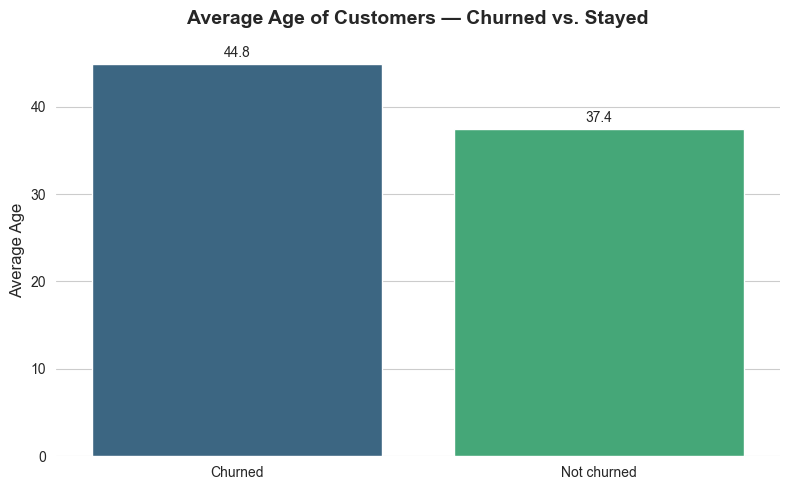

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Converte o resultado do groupby em DataFrame
age_data = pd.DataFrame(ChurnedByAvgAge).reset_index()
age_data = age_data.sort_values(by='Age', ascending=False)

# Alternativamente, pode-se definir age_data no início
# age_data = pd.DataFrame(ChurnedByAvgAge).reset_index()
# age_data = age_data.sort_values(by='Age', ascending=False)

plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")

# Gráfico de barras com paleta vinculada ao hue
sns.barplot(
    data=age_data,
    x='Churned',
    y='Age',
    hue='Churned',
    palette='viridis',
    legend=False
)

# Título e rótulos
plt.title('Average Age of Customers — Churned vs. Stayed', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('')
plt.ylabel('Average Age', fontsize=12)

# Adiciona os valores acima das barras
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%.1f', label_type='edge', fontsize=10, padding=3)

# Remove bordas desnecessárias e ajusta layout
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


-----------------------------------
- ##### **Comparação do saldo médio entre clientes que saíram e aqueles que ficaram.**

In [146]:
ChurnedByAvgBalance = df.groupby(by ='Churned')['Balance'].mean()
ChurnedByAvgBalance

Churned
Churned        91108.539337
Not churned    72745.296779
Name: Balance, dtype: float64

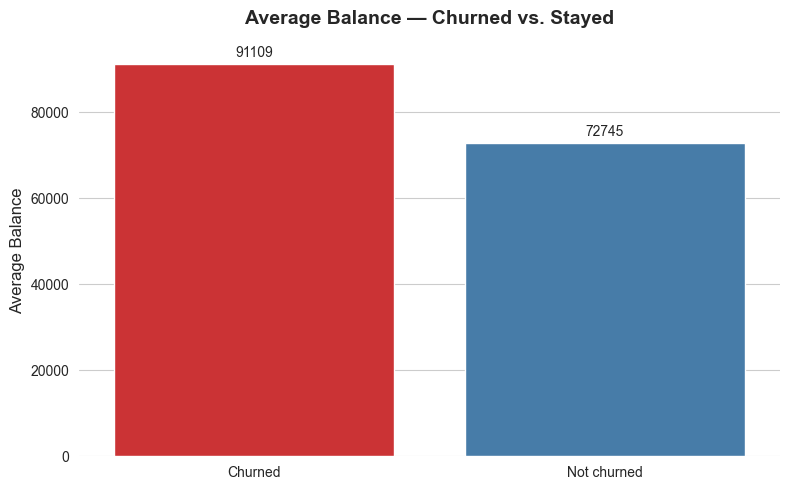

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Converte e ordena
age_data = pd.DataFrame(ChurnedByAvgBalance)
age_data = age_data.sort_values(by='Balance', ascending=False)

# Estilo visual
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))

# Gráfico com correção do hue
sns.barplot(
    data=age_data,
    x='Churned',
    y='Balance',
    hue='Churned',
    palette='Set1',
    legend=False
)

# Título e eixos
plt.title('Average Balance — Churned vs. Stayed', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('')
plt.ylabel('Average Balance', fontsize=12)

# Formata os valores nas barras
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%.0f', label_type='edge', fontsize=10, padding=3)

# Ajustes visuais
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


- ##### **Este gráfico de barras revela um dado crítico e alarmante: os clientes que abandonaram o banco tinham um saldo médio significativamente maior do que aqueles que permaneceram. Isso significa que o banco não está conseguindo reter seus clientes mais valiosos e com alto patrimônio, o que ameaça diretamente sua lucratividade e estabilidade. A causa provável é que os concorrentes estão oferecendo um serviço melhor, taxas de juros mais competitivas ou condições mais atrativas para esse segmento desejável. O banco deve mudar imediatamente sua estratégia de retenção para se concentrar em entender e atender às necessidades de seus clientes com alto patrimônio, a fim de evitar perdas adicionais de seus ativos mais importantes.**
------------------------------

- ##### **Comparação da categoria de pontuação de crédito entre clientes que saíram e aqueles que permaneceram**

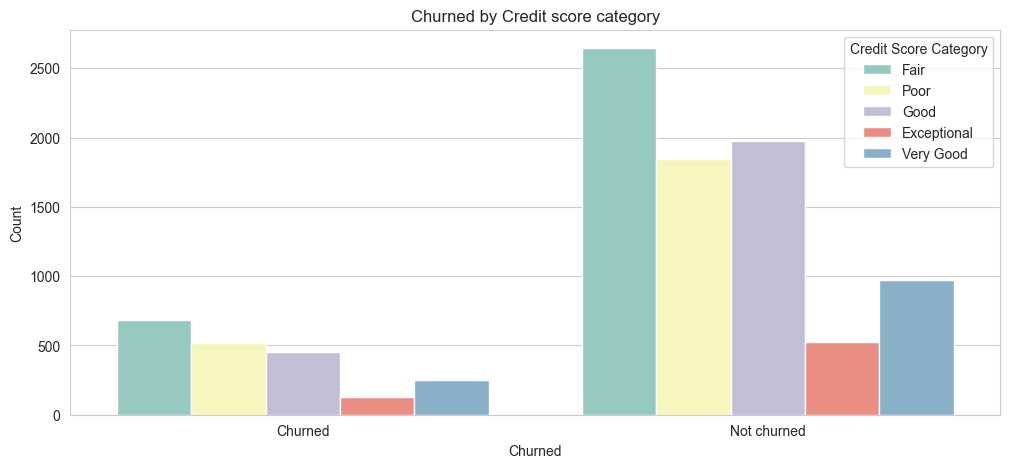

In [148]:
plt.figure(figsize=(12, 5))
sns.countplot(data = df, x ='Churned', hue='Credit Score Category', palette='Set3')
plt.title('Churned by Credit score category')
plt.xlabel('Churned')
plt.ylabel('Count')
plt.show()

##### **Número de clientes em cada grupo de pontuação de crédito, tanto para clientes que saíram quanto para os que permaneceram. Embora o maior número de clientes em ambos os grupos se enquadre na categoria de pontuação de crédito "Regular", a distribuição proporcional das pontuações de crédito é muito semelhante para clientes que abandonaram a conta e para clientes que permaneceram na conta. Isso indica que a pontuação de crédito de um cliente pode não ser um preditor significativo da sua rotatividade. A rotatividade está presente em todas as categorias de pontuação de crédito, e nenhum grupo apresenta uma probabilidade desproporcionalmente maior de saída.**
----------------------------

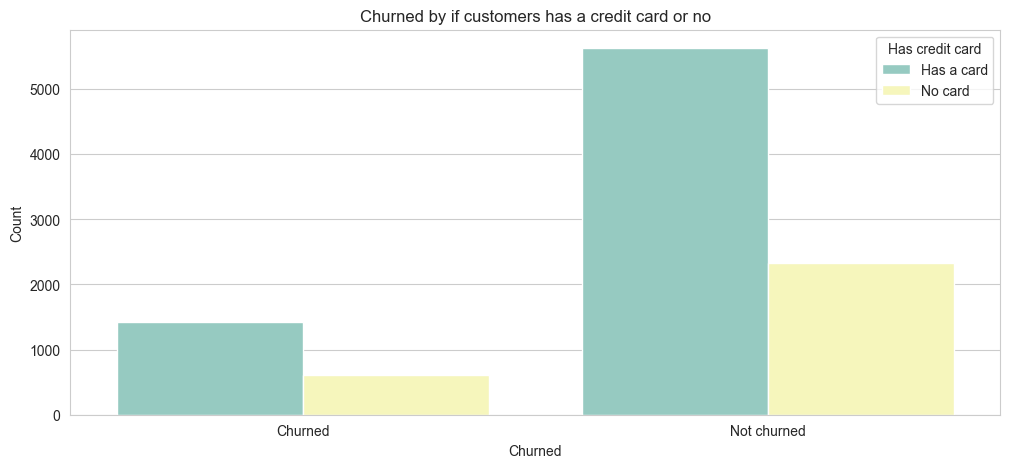

In [149]:
plt.figure(figsize=(12, 5))
sns.countplot(data = df, x ='Churned', hue='Has credit card', palette='Set3')
plt.title('Churned by if customers has a credit card or no')
plt.xlabel('Churned')
plt.ylabel('Count')
plt.show()

#### **O gráfico mostra que o número total de desistentes que são portadores de cartão é maior simplesmente porque já existem mais deles. Mas quando analisamos o risco para cada cliente individual, descobrimos que:**

- ##### **Um cliente que possui um cartão de crédito tem uma probabilidade maior (27%) de sair.**

- ##### **Um cliente que não possui um cartão de crédito tem uma probabilidade menor (20%) de sair.**

#### **Portanto, ter um cartão de crédito está associado a um risco maior de rotatividade de clientes, e não ter um é um fator menor que ajuda a reter o cliente. Você está vendo o número total, mas o importante é a proporção dentro de cada grupo.**

- ##### **Efeito de membro ativo ou não na possibilidade de sair**

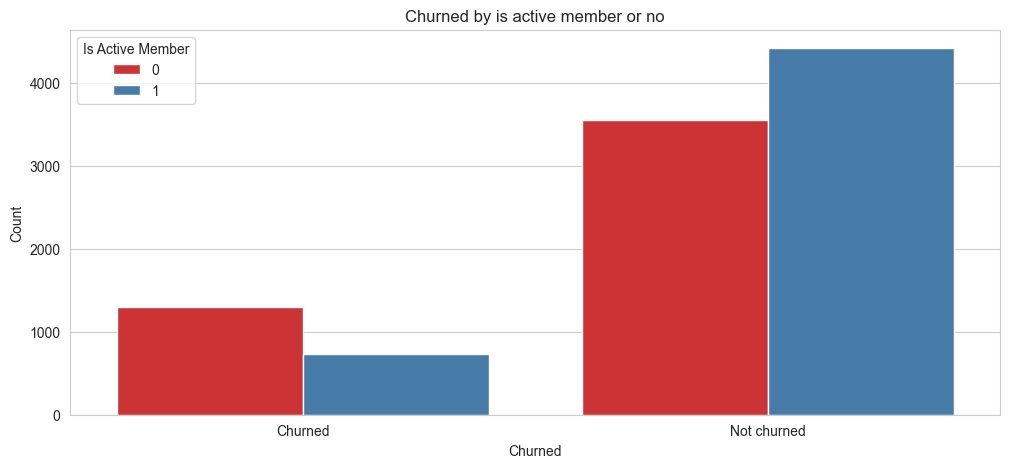

In [150]:
plt.figure(figsize=(12, 5))
sns.countplot(data = df, x ='Churned', hue='Is Active Member', palette='Set1')
plt.title('Churned by is active member or no')
plt.xlabel('Churned')
plt.ylabel('Count')
plt.show()

### ***Estudo do comportamento do cliente***
-------------------

- ##### **Os clientes com Número de Produtos = 1 tendem a sair com mais ou menos frequência?**

In [151]:
nmbOfProdEq1 = df[df['Number Of Products']==1]
nmbOfProdEq1

,Credit Score,Geography,Gender,Age,Tenure,Balance,Number Of Products,Has credit card,Is Active Member,Estimated Salary,Churned,Age Group,Balance category,Is active Member,Credit Score Category,Estimated Salary Category,BalanceSalaryRatio
0,619,France,Female,42,2,0.00,1,Has a card,1,101348.88,Churned,Middle-Aged Adults,Empty account,Active account,Fair,High,0.000000
1,608,Spain,Female,41,1,83807.86,1,No card,1,112542.58,Not churned,Middle-Aged Adults,Funded account,Active account,Fair,High,0.744677
4,850,Spain,Female,43,2,125510.82,1,Has a card,1,79084.10,Not churned,Middle-Aged Adults,Funded account,Active account,Exceptional,Medium,1.587055
9,684,France,Male,27,2,134603.88,1,Has a card,1,71725.73,Not churned,Young Adults,Funded account,Active account,Good,Medium,1.876647
16,653,Germany,Male,58,1,132602.88,1,Has a card,0,5097.67,Churned,Middle-Aged Adults,Funded account,Dormant account,Fair,Low,26.012449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,726,Spain,Male,36,2,0.00,1,Has a card,0,195192.40,Not churned,Young Adults,Empty account,Dormant account,Good,Very High,0.000000
9993,644,France,Male,28,7,155060.41,1,Has a card,0,29179.52,Not churned,Young Adults,Funded account,Dormant account,Fair,Low,5.314015
9996,516,France,Male,35,10,57369.61,1,Has a card,1,101699.77,Not churned,Young Adults,Funded account,Active account,Poor,High,0.564108
9997,709,France,Female,36,7,0.00,1,No card,1,42085.58,Churned,Young Adults,Empty account,Active account,Good,Low,0.000000


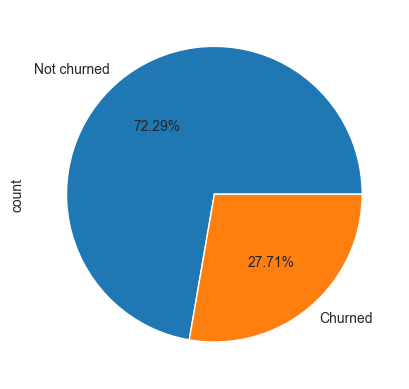

In [152]:
nmbOfProdEq1['Churned'].value_counts().plot.pie(autopct='%0.2f%%')
plt.show()

- ##### **Os clientes com Número de Produtos = 2 tendem a sair com mais ou menos frequência?**

In [153]:
nmbOfProdGte2 = df[df['Number Of Products']>=2]
nmbOfProdGte2

,Credit Score,Geography,Gender,Age,Tenure,Balance,Number Of Products,Has credit card,Is Active Member,Estimated Salary,Churned,Age Group,Balance category,Is active Member,Credit Score Category,Estimated Salary Category,BalanceSalaryRatio
2,502,France,Female,42,8,159660.80,3,Has a card,0,113931.57,Churned,Middle-Aged Adults,Funded account,Dormant account,Poor,High,1.401375
3,699,France,Female,39,1,0.00,2,No card,0,93826.63,Not churned,Young Adults,Empty account,Dormant account,Good,Medium,0.000000
5,645,Spain,Male,44,8,113755.78,2,Has a card,0,149756.71,Churned,Middle-Aged Adults,Funded account,Dormant account,Fair,High,0.759604
6,822,France,Male,50,7,0.00,2,Has a card,1,10062.80,Not churned,Middle-Aged Adults,Empty account,Active account,Exceptional,Low,0.000000
7,376,Germany,Female,29,4,115046.74,4,Has a card,0,119346.88,Churned,Young Adults,Funded account,Dormant account,Poor,High,0.963969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,775,France,Male,30,4,0.00,2,Has a card,0,49337.84,Not churned,Young Adults,Empty account,Dormant account,Very Good,Low,0.000000
9989,841,Spain,Male,28,4,0.00,2,Has a card,1,179436.60,Not churned,Young Adults,Empty account,Active account,Exceptional,Very High,0.000000
9994,800,France,Female,29,2,0.00,2,No card,0,167773.55,Not churned,Young Adults,Empty account,Dormant account,Exceptional,Very High,0.000000
9995,771,France,Male,39,5,0.00,2,Has a card,0,96270.64,Not churned,Young Adults,Empty account,Dormant account,Very Good,Medium,0.000000


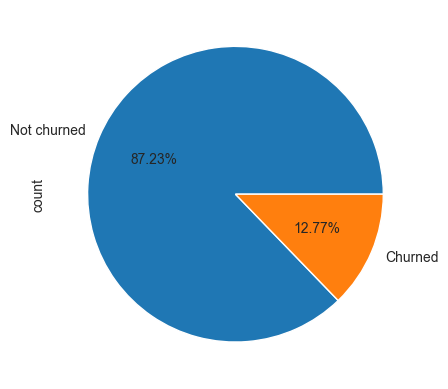

In [154]:
nmbOfProdGte2['Churned'].value_counts().plot.pie(autopct='%0.2f%%')
plt.show()

- ##### **Os clientes com tempo de serviço < 3 anos tendem a sair com mais ou menos frequência?**

In [155]:
tenureLt3years = df[df['Tenure']<3]
tenureLt3years

,Credit Score,Geography,Gender,Age,Tenure,Balance,Number Of Products,Has credit card,Is Active Member,Estimated Salary,Churned,Age Group,Balance category,Is active Member,Credit Score Category,Estimated Salary Category,BalanceSalaryRatio
0,619,France,Female,42,2,0.00,1,Has a card,1,101348.88,Churned,Middle-Aged Adults,Empty account,Active account,Fair,High,0.000000
1,608,Spain,Female,41,1,83807.86,1,No card,1,112542.58,Not churned,Middle-Aged Adults,Funded account,Active account,Fair,High,0.744677
3,699,France,Female,39,1,0.00,2,No card,0,93826.63,Not churned,Young Adults,Empty account,Dormant account,Good,Medium,0.000000
4,850,Spain,Female,43,2,125510.82,1,Has a card,1,79084.10,Not churned,Middle-Aged Adults,Funded account,Active account,Exceptional,Medium,1.587055
9,684,France,Male,27,2,134603.88,1,Has a card,1,71725.73,Not churned,Young Adults,Funded account,Active account,Good,Medium,1.876647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9975,610,Germany,Male,50,1,113957.01,2,Has a card,0,196526.55,Churned,Middle-Aged Adults,Funded account,Dormant account,Fair,Very High,0.579856
9979,677,France,Female,58,1,90022.85,1,No card,1,2988.28,Not churned,Middle-Aged Adults,Funded account,Active account,Good,Low,30.125306
9986,673,Germany,Male,47,1,183579.54,2,No card,1,34047.54,Not churned,Middle-Aged Adults,Funded account,Active account,Good,Low,5.391859
9992,726,Spain,Male,36,2,0.00,1,Has a card,0,195192.40,Not churned,Young Adults,Empty account,Dormant account,Good,Very High,0.000000


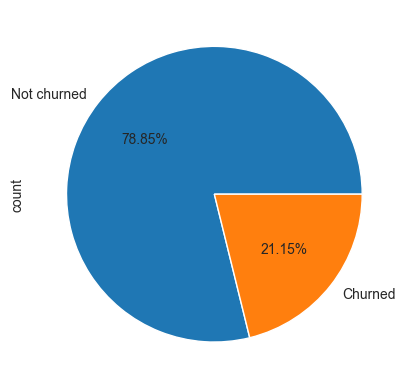

In [156]:
tenureLt3years['Churned'].value_counts().plot.pie(autopct='%0.2f%%')
plt.show()

---------------------------
- ##### **Clientes com tempo de serviço igual ou superior a 3 anos tendem a sair com mais ou menos frequência?**

In [157]:
tenureGte3years = df[df['Tenure']>=3]
tenureGte3years

,Credit Score,Geography,Gender,Age,Tenure,Balance,Number Of Products,Has credit card,Is Active Member,Estimated Salary,Churned,Age Group,Balance category,Is active Member,Credit Score Category,Estimated Salary Category,BalanceSalaryRatio
2,502,France,Female,42,8,159660.80,3,Has a card,0,113931.57,Churned,Middle-Aged Adults,Funded account,Dormant account,Poor,High,1.401375
5,645,Spain,Male,44,8,113755.78,2,Has a card,0,149756.71,Churned,Middle-Aged Adults,Funded account,Dormant account,Fair,High,0.759604
6,822,France,Male,50,7,0.00,2,Has a card,1,10062.80,Not churned,Middle-Aged Adults,Empty account,Active account,Exceptional,Low,0.000000
7,376,Germany,Female,29,4,115046.74,4,Has a card,0,119346.88,Churned,Young Adults,Funded account,Dormant account,Poor,High,0.963969
8,501,France,Male,44,4,142051.07,2,No card,1,74940.50,Not churned,Middle-Aged Adults,Funded account,Active account,Poor,Medium,1.895518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,Has a card,0,96270.64,Not churned,Young Adults,Empty account,Dormant account,Very Good,Medium,0.000000
9996,516,France,Male,35,10,57369.61,1,Has a card,1,101699.77,Not churned,Young Adults,Funded account,Active account,Poor,High,0.564108
9997,709,France,Female,36,7,0.00,1,No card,1,42085.58,Churned,Young Adults,Empty account,Active account,Good,Low,0.000000
9998,772,Germany,Male,42,3,75075.31,2,Has a card,0,92888.52,Churned,Middle-Aged Adults,Funded account,Dormant account,Very Good,Medium,0.808230


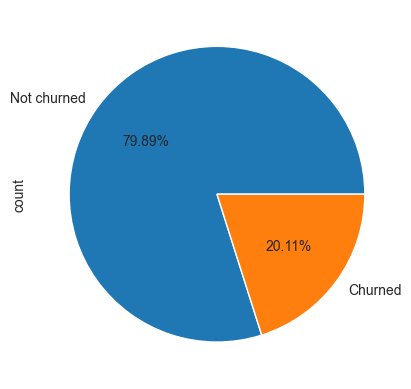

In [158]:
tenureGte3years['Churned'].value_counts().plot.pie(autopct='%0.2f%%')
plt.show()

- ##### **Relação entre balance and churn**

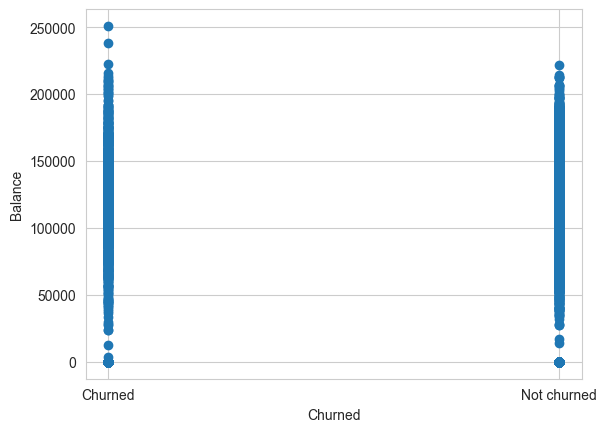

In [159]:
plt.scatter(df['Churned'], df['Balance'])
plt.xlabel('Churned')
plt.ylabel('Balance')
plt.show()

- ##### **Mais Opções**: Clientes mais ricos com saldos mais altos são provavelmente alvos mais atraentes para as ofertas dos concorrentes e podem ter mais produtos financeiros (por exemplo, investimentos, contas em outros bancos), facilitando a troca.

- ##### **Expectativas Mais Elevadas**: Clientes com saldos maiores podem ter expectativas mais elevadas em relação ao serviço, taxas de juros e vantagens. Se o banco não atender a essas expectativas, é mais provável que eles busquem outro banco.

- ##### **Atividade Financeira**: Um saldo alto pode estar associado a um evento único (por exemplo, vender uma casa, receber uma herança) após o qual o cliente encerra a conta.

##### Saldo alto é um importante fator de risco para a rotatividade de clientes. O banco deve prestar atenção especial à retenção de seus clientes de alto valor, pois eles são os mais propensos a sair.

### ***Segmentação e análise***
------------------------



- ​​##### **Comparação da faixa etária entre quem ficou e quem saiu**

In [160]:
countOfChurnedOrNoByAgeGroup = pd.crosstab(df['Age Group'], df['Churned'])
countOfChurnedOrNoByAgeGroup

Churned,Churned,Not churned
Age Group,,
Middle-Aged Adults,1204,1851
Senior Adults,147,379
Young Adults,686,5733


In [161]:
val1 = countOfChurnedOrNoByAgeGroup.iloc[0,:1].values
val2 = countOfChurnedOrNoByAgeGroup.iloc[0,1:2].values

sum = val1 + val2
p = (val1/sum)*100
p2 = (val2/sum)*100
print('Exited Middle-aged Adults',p,'%')
print('Stayed Middle-aged Adults',p2,'%')

Exited Middle-aged Adults [39.41080196] %
Stayed Middle-aged Adults [60.58919804] %


In [162]:
val1 = countOfChurnedOrNoByAgeGroup.iloc[1,:1].values
val2 = countOfChurnedOrNoByAgeGroup.iloc[1,1:2].values

sum = val1 + val2
p = (val1/sum)*100
p2 = (val2/sum)*100
print('Exited Old Adults',p,'%')
print('Stayed Old Adults',p2,'%')

Exited Old Adults [27.94676806] %
Stayed Old Adults [72.05323194] %


In [163]:
val1 = countOfChurnedOrNoByAgeGroup.iloc[2,:1].values
val2 = countOfChurnedOrNoByAgeGroup.iloc[2,1:2].values

sum = val1 + val2
p = (val1/sum)*100
p2 = (val2/sum)*100
print('Exited Young Adults',p,'%')
print('Stayed Young Adults',p2,'%')

Exited Young Adults [10.6870229] %
Stayed Young Adults [89.3129771] %


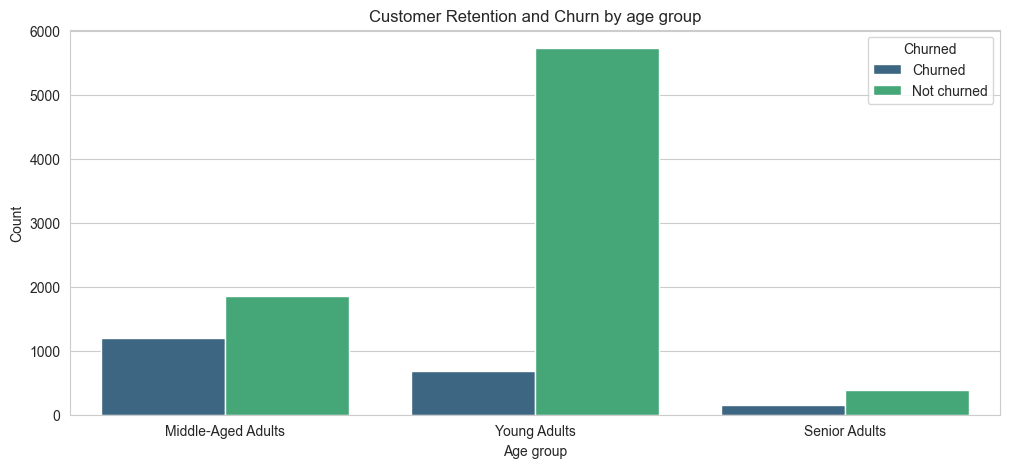

In [164]:
plt.figure(figsize=(12, 5))
sns.countplot(data = df, x ='Age Group', hue='Churned',palette='viridis')
plt.title('Customer Retention and Churn by age group')
plt.xlabel('Age group')
plt.ylabel('Count')
plt.show()

- ##### **Young Adults:** Este grupo tem o maior número de clientes em geral e apresenta a maior retenção. O número de jovens adultos que permaneceram é significativamente maior do que o daqueles que saíram, indicando que eles são a base de clientes mais fiel.

- ##### **Middle Aged Adults:** Este grupo tem o maior número de clientes que abandonaram a empresa, com aproximadamente 1.200 saindo. Isso sugere um risco significativo de rotatividade nesse grupo demográfico.

- ##### **Sennior Adults:** Embora este grupo tenha o menor número total de clientes, eles também apresentam uma alta taxa de rotatividade em relação ao seu tamanho, indicando que são mais propensos a abandonar a empresa.
----------------------------------

- ##### **Taxa de rotatividade por geografia e grupo de pontuação de crédito**

In [165]:
df['Churned'].unique()

array(['Churned', 'Not churned'], dtype=object)

In [166]:
df['Churned_numeric'] = df['Churned'].map({'Churned': 1, 'Not churned': 0})
df['Churned_numeric']

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Churned_numeric, Length: 10000, dtype: int64

In [167]:
# Verify the conversion
print("Unique values in Churned_numeric column:", df['Churned_numeric'].unique())
print(f"Churn rate: {df['Churned_numeric'].mean()*100:.2f}%")

Unique values in Churned_numeric column: [1 0]
Churn rate: 20.37%


In [168]:
# Check the unique values in the 'Geography' column
print("Countries in the dataset:", df['Geography'].unique())

Countries in the dataset: ['France' 'Spain' 'Germany']


In [169]:
# Get basic statistics for CreditScore by Country
print("\nCredit Score statistics by country:")
print(df.groupby('Geography')['Credit Score Category'].describe())


Credit Score statistics by country:
          count unique   top  freq
Geography                         
France     5014      5  Fair  1621
Germany    2509      5  Fair   861
Spain      2477      5  Fair   849


In [170]:
# Define a threshold for "low" credit score (bottom 25th percentile)
low_score_threshold = df['Credit Score'].quantile(0.25)
print(f"\nLow Credit Score Threshold (25th percentile): {low_score_threshold}")


Low Credit Score Threshold (25th percentile): 584.0


In [171]:
# Create a new column to flag customers with low credit scores
df['LowCreditScore'] = df['Credit Score'] < low_score_threshold
df['LowCreditScore']

0       False
1       False
2        True
3       False
4       False
        ...  
9995    False
9996     True
9997    False
9998    False
9999    False
Name: LowCreditScore, Length: 10000, dtype: bool

In [172]:
# Create a summary table using the numeric column
churn_analysis = df.groupby(['Geography', 'LowCreditScore'])['Churned_numeric'].agg(['mean', 'count', 'sum'])
churn_analysis['mean'] = churn_analysis['mean'] * 100 # Convert to percentage
churn_analysis = churn_analysis.rename(columns={
    'mean': 'ChurnRate (%)', 
    'sum': 'Num_Churned', 
    'count': 'Total_Customers'
})

print("\nChurn Analysis by Geography and Credit Score Group:")
print(churn_analysis)


Churn Analysis by Geography and Credit Score Group:
                          ChurnRate (%)  Total_Customers  Num_Churned
Geography LowCreditScore                                             
France    False               15.679443             3731          585
          True                17.537023             1283          225
Germany   False               31.378764             1893          594
          True                35.714286              616          220
Spain     False               16.445623             1885          310
          True                17.398649              592          103


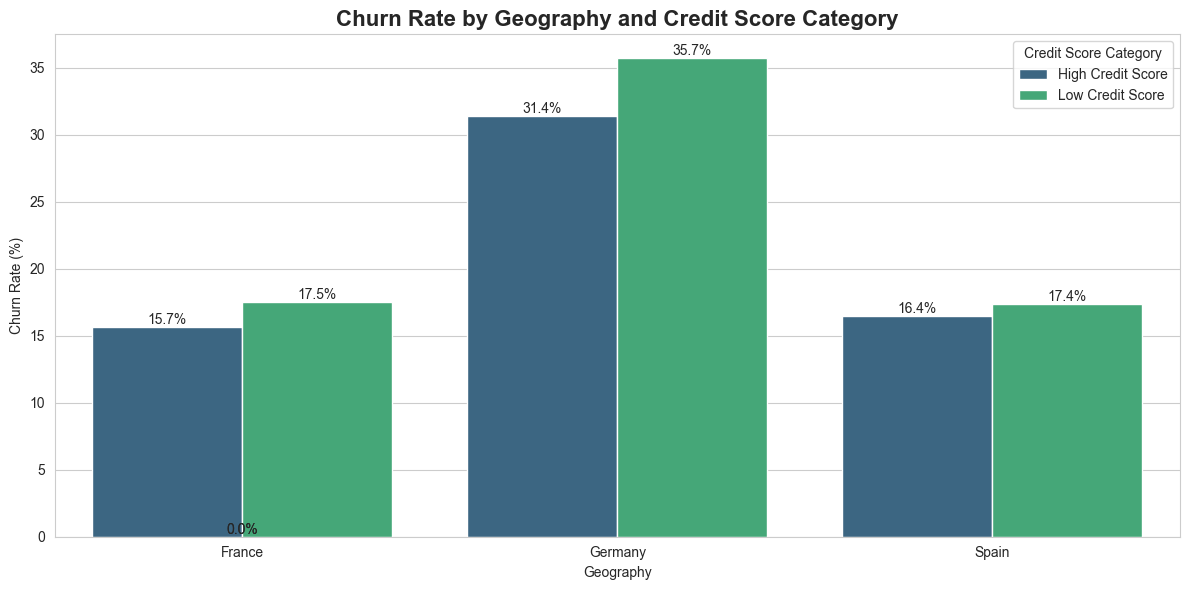

In [173]:
# Prepare data for plotting
pivot_df = df.groupby(['Geography', 'LowCreditScore'])['Churned_numeric'].mean().reset_index()
pivot_df['Churned_numeric'] = pivot_df['Churned_numeric'] * 100 # Convert to percentage

# Create the plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Geography', y='Churned_numeric', hue='LowCreditScore', 
                 data=pivot_df, palette='viridis')

plt.title('Churn Rate by Geography and Credit Score Category', fontsize=16, fontweight='bold')
plt.xlabel('Geography')
plt.ylabel('Churn Rate (%)')

# Customize legend labels
legend_labels = ['High Credit Score', 'Low Credit Score']
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, legend_labels, title='Credit Score Category')

# Add value labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

##### **Clientes com baixa pontuação de crédito têm uma probabilidade significativamente maior de abandono, e esse padrão se aplica aos três países. O risco é mais grave na Alemanha e na Espanha, onde aproximadamente 35% dos clientes com baixa pontuação de crédito abandonam a empresa. A França apresenta a mesma tendência, mas com uma taxa geral de abandono ligeiramente menor.**

In [174]:
# Test for a specific country, e.g., Germany
country_to_test = 'Germany'

germany_data = df[df['Geography'] == country_to_test]
germany_low = germany_data[germany_data['LowCreditScore']]['Churned_numeric']
germany_high = germany_data[~germany_data['LowCreditScore']]['Churned_numeric']

print(f"\nStatistical test for {country_to_test}:")
print(f"Low credit score group: {len(germany_low)} customers, churn rate: {germany_low.mean()*100:.1f}%")
print(f"High credit score group: {len(germany_high)} customers, churn rate: {germany_high.mean()*100:.1f}%")

# Perform T-test
t_stat, p_value = stats.ttest_ind(germany_low, germany_high, alternative='greater')

print(f"T-test: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")
if p_value < 0.05:
    print("The difference is statistically significant.")
else:
    print("The difference is not statistically significant.")


Statistical test for Germany:
Low credit score group: 616 customers, churn rate: 35.7%
High credit score group: 1893 customers, churn rate: 31.4%
T-test: t-statistic = 1.9972, p-value = 0.0230
The difference is statistically significant.


- ##### **Distribuição de Salário por Faixa Etária e Status de Rotatividade para jovens adultos**

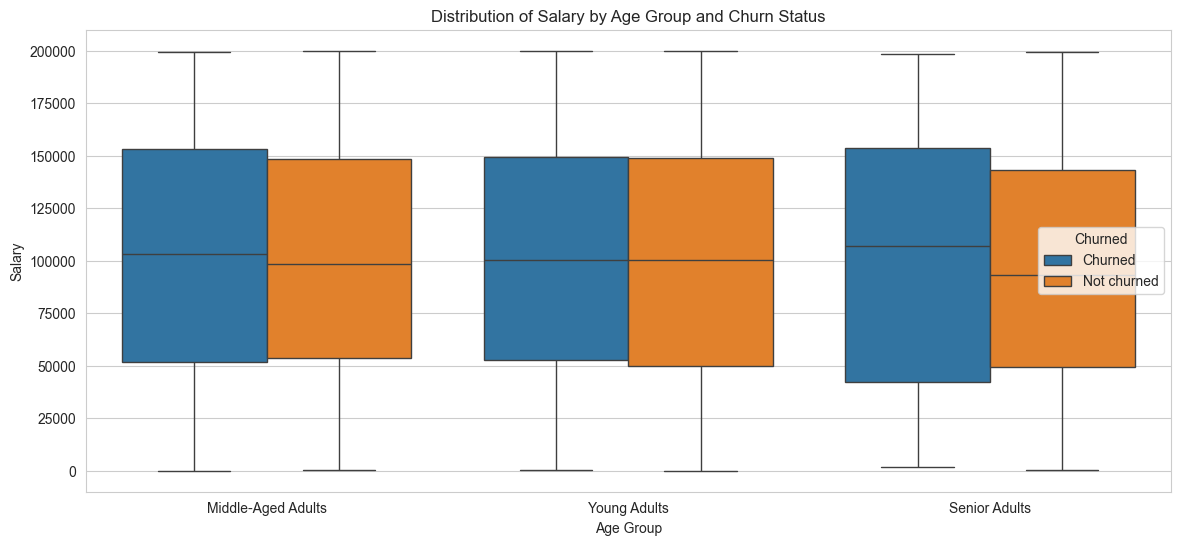

In [175]:
plt.figure(figsize=(14, 6))
# Create a boxplot of Salary, split by AgeGroup and Churn status
sns.boxplot(data=df, x='Age Group', y='Estimated Salary', hue='Churned', showfliers=False) # showfliers=False removes outliers for a clearer view
plt.title('Distribution of Salary by Age Group and Churn Status')
plt.ylabel('Salary')
plt.xlabel('Age Group')
plt.show()

- ##### **Este fenômeno se aplica principalmente ao grupo de Jovens Adultos.**

- ##### **O que isso significa? É provável que jovens funcionários de alto desempenho (o que se reflete em seus salários mais altos) estejam sendo atraídos por concorrentes com ofertas melhores ou se sintam desvalorizados, o que os leva a pedir demissão.**

#### **Recomendação: A gestão de RH ou as estratégias de retenção de clientes devem se concentrar urgentemente em políticas de retenção para jovens talentos de alto desempenho.**

### Conclusão



Principais achados

- Visão geral: a coluna Churned foi convertida em numérico (Churned_numeric) e usada em várias análises. Padrões consistentes mostram que churn não é aleatório — está associado a características demográficas e financeiras.

- Idade: Young Adults têm maior representatividade e maior retenção; Middle‑Aged Adults concentram o maior número absoluto de saídas; Senior Adults têm alta taxa de churn relativa ao tamanho do grupo.

- Saldo (Balance): clientes que saíram apresentam saldo médio significativamente maior — risco financeiro alto (perda de clientes de alto valor).

- Salário estimado: distribuição assimétrica; homens concentrados em faixas salariais mais altas. Entre Young Adults, salários mais altos parecem associados a maior churn.

- Score de crédito: clientes com LowCreditScore (quartil inferior) têm churn bem maior em todos os países; análise estatística (t‑test) mostra diferença relevante em pelo menos alguns países.

- Geografia: França tem maior base; Alemanha apresenta a maior taxa proporcional de churn; Espanha tem a menor taxa.

- Gênero: proporção de saída é maior entre mulheres (mesmo com menor contagem absoluta em alguns casos).

- Produtos / cartão / atividade:

  - Clientes com cartão de crédito mostraram maior probabilidade de sair (proporções reportadas no notebook).

  - Is Active Member e Number Of Products apresentam relação com churn (visualizações feitas), indicando diferenças comportamentais entre grupos.

- Features úteis já criadas: Age Group, Balance category, Credit Score Category, Estimated Salary Category, BalanceSalaryRatio, LowCreditScore — todas prontas para modelagem.



Riscos prioritários

1. Perda de clientes de alto saldo (impacto financeiro alto).

2. Clientes com baixa pontuação de crédito (maior propensão a churn).

3. Segmentos geográficos (Alemanha) e demográficos (middle‑aged, senior, mulheres) com maior taxa relativa de saída.



Recomendações práticas (priorizadas)

1. Retenção imediata de clientes de alto saldo: ofertas personalizadas (condições, relacionamento gerenciado) e monitoramento de sinais de saída.

2. Programa de recuperação para clientes com LowCreditScore: educação financeira, reestruturação de produtos e incentivos.

3. Testes dirigidos por país (Alemanha primeiro): campanhas de retenção A/B e análise de canais.

4. Reavaliar produtos/benefícios para portadores de cartão (investigar por que portadores têm maior churn).

5. Segmentar ações por Age Group (focar Middle‑Aged e Senior) e por gênero onde apropriado.

6. Implementar monitoramento contínuo de churn rate por cohort (tenure, produtos, saldo).





In [ ]:
#!jupyter nbconvert --to html "estudo.ipynb"


[NbConvertApp] Converting notebook estudo.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 19 image(s).
[NbConvertApp] Writing 1152326 bytes to estudo.html
